In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [23]:
# 한글 폰트 설정 (Windows 환경 가정, Mac인 경우 'AppleGothic'으로 변경 필요)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [30]:
df_vip= pd.read_csv('model_wideformat_data/VIP_Final_Risk_Score_Centered_WideFormat.csv')

In [31]:
df_vip

,발급회원번호,이용건수_신용_B0M_07,이용건수_신용_B0M_08,이용건수_신용_B0M_09,이용건수_신용_B0M_10,이용건수_신용_B0M_11,이용건수_신용_B0M_12,이용금액_신용_B0M_07,이용금액_신용_B0M_08,이용금액_신용_B0M_09,...,Slope_Spend,Slope_Balance,Slope_Count,Norm_Slope_Spend,Norm_Slope_Balance,Norm_Slope_Count,Score_Slope_Total,Final_Total_Score,Score_Clipped,Risk_Score_Centered
0,SYN_100022,19,14,17,15,22,20,480339,521058,468354,...,28027.771429,315487.257143,0.771429,0.000000,0.000000,0.000000,0.000000,-8.561691,-8.561691,-64.722353
1,SYN_1000502,62,64,61,65,68,64,384296,374107,333770,...,19823.171429,-71971.028571,0.742857,0.000000,0.033608,0.000000,1.008255,-5.125110,-5.125110,-45.426984
2,SYN_1000924,45,45,47,47,44,40,1321537,1317041,1210077,...,-17637.114286,-44749.971429,-0.800000,0.041803,0.020897,0.070707,4.420257,-0.198539,-0.198539,-17.765765
3,SYN_1001012,25,25,26,27,30,28,359449,465522,522558,...,25879.285714,12654.971429,0.885714,0.000000,0.000000,0.000000,0.000000,-9.009486,-9.009486,-67.236588
4,SYN_1001025,72,74,71,76,72,72,2005304,1864818,1688989,...,-87094.714286,-210694.971429,-0.028571,0.206431,0.098389,0.002525,11.284672,0.314081,0.314081,-14.887556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8897,SYN_997880,26,32,34,38,38,37,1197262,1183762,1280407,...,81332.285714,99321.057143,2.200000,0.000000,0.000000,0.000000,0.000000,-11.805162,-11.805162,-82.933471
8898,SYN_998308,86,82,85,83,83,84,2723784,2580562,2642829,...,-26866.428571,-208464.057143,-0.257143,0.063679,0.097347,0.022727,6.149373,-1.344510,-1.344510,-24.200048
8899,SYN_998413,49,48,51,62,58,61,1479938,1220667,1484748,...,-22851.485714,-27506.514286,2.885714,0.054162,0.012845,0.000000,2.551841,-9.620073,-9.620073,-70.664851
8900,SYN_998910,20,25,25,25,19,29,791913,823831,907859,...,14807.600000,-33306.742857,0.771429,0.000000,0.015553,0.000000,0.466600,-5.637154,-5.637154,-48.301956



군집별 데이터 개수:
cluster_label_swapped
0    1452
1    3506
2    3944
Name: count, dtype: int64


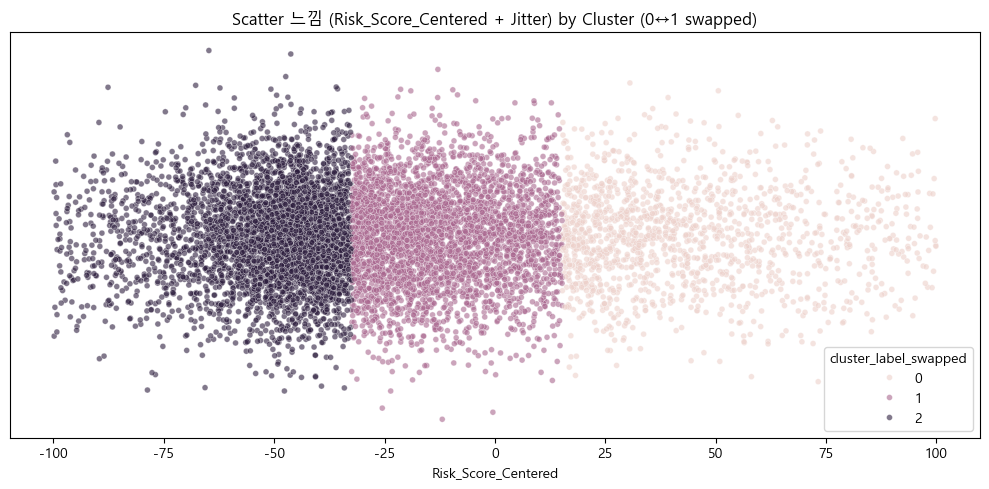

In [32]:
X = df_vip[['Risk_Score_Centered']]

# KMeans 모델 생성 (군집 3개)
# random_state를 고정하면 돌릴 때마다 똑같은 결과가 나와서 좋아.
kmeans = KMeans(n_clusters=3, random_state=42)

# 학습 및 예측 (군집 번호 0, 1, 2 생성)
df_vip['cluster_label'] = kmeans.fit_predict(X)

X = df_vip[["Risk_Score_Centered"]].copy()
kmeans = KMeans(n_clusters=3, random_state=42)
df_vip["cluster_label"] = kmeans.fit_predict(X)

# ✅ 여기 추가: 0과 1만 바꾸기(2는 그대로)
df_vip["cluster_label_swapped"] = df_vip["cluster_label"].replace({0: 1, 1: 0})

# 각 군집별로 데이터가 몇 개씩 들어갔는지 확인해볼까?
print("\n군집별 데이터 개수:")
print(df_vip['cluster_label_swapped'].value_counts().sort_index())

# y축에 아주 작은 흔들림 주기(점 겹침 방지)
np.random.seed(42)
df_vip["y_jitter"] = np.random.normal(loc=0, scale=0.03, size=len(df_vip))

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df_vip,
    x="Risk_Score_Centered",
    y="y_jitter",
    hue="cluster_label_swapped",   # ✅ 스왑된 라벨로 표시
    hue_order=[0, 1, 2],           # ✅ 범례 순서 고정
    s=18,
    alpha=0.6
)

plt.title("Scatter 느낌 (Risk_Score_Centered + Jitter) by Cluster (0↔1 swapped)")
plt.xlabel("Risk_Score_Centered")
plt.ylabel("")
plt.yticks([])

plt.tight_layout()
plt.savefig("viz_scatter_jitter_by_cluster_swapped01.png", dpi=200)
plt.show()


In [33]:
df_vip['cluster_label_swapped'].value_counts(normalize = True)

cluster_label_swapped
2    0.443047
1    0.393844
0    0.163109
Name: proportion, dtype: float64

In [34]:
# Target 변수 생성 함수 정의
def create_target(label):
    if label == 0:
        return 1  # 이탈 (군집 0)
    else:
        return 0  # 잔존 (군집 1, 2)

# apply 함수를 써서 Target 컬럼 만들기
df_vip['Target'] = df_vip['cluster_label_swapped'].apply(create_target)

# 잘 만들어졌는지 결과 확인!
print("\n생성된 Target 변수 분포:")
print(df_vip['Target'].value_counts())

# 최종 데이터 확인
display(df_vip.head(10))


생성된 Target 변수 분포:
Target
0    7450
1    1452
Name: count, dtype: int64


,발급회원번호,이용건수_신용_B0M_07,이용건수_신용_B0M_08,이용건수_신용_B0M_09,이용건수_신용_B0M_10,이용건수_신용_B0M_11,이용건수_신용_B0M_12,이용금액_신용_B0M_07,이용금액_신용_B0M_08,이용금액_신용_B0M_09,...,Norm_Slope_Balance,Norm_Slope_Count,Score_Slope_Total,Final_Total_Score,Score_Clipped,Risk_Score_Centered,cluster_label,cluster_label_swapped,y_jitter,Target
0,SYN_100022,19,14,17,15,22,20,480339,521058,468354,...,0.000000,0.000000,0.000000,-8.561691,-8.561691,-64.722353,2,2,0.014901,0
1,SYN_1000502,62,64,61,65,68,64,384296,374107,333770,...,0.033608,0.000000,1.008255,-5.125110,-5.125110,-45.426984,2,2,-0.004148,0
2,SYN_1000924,45,45,47,47,44,40,1321537,1317041,1210077,...,0.020897,0.070707,4.420257,-0.198539,-0.198539,-17.765765,0,1,0.019431,0
3,SYN_1001012,25,25,26,27,30,28,359449,465522,522558,...,0.000000,0.000000,0.000000,-9.009486,-9.009486,-67.236588,2,2,0.045691,0
4,SYN_1001025,72,74,71,76,72,72,2005304,1864818,1688989,...,0.098389,0.002525,11.284672,0.314081,0.314081,-14.887556,0,1,-0.007025,0
5,SYN_1001031,38,37,31,28,30,25,681867,695619,751099,...,0.026621,0.224747,10.376452,6.177966,6.177966,18.036401,1,0,-0.007024,1
6,SYN_1001048,81,78,79,80,76,76,2022269,1981606,2180086,...,0.000000,0.075758,2.272727,-1.993278,-1.993278,-27.842687,0,1,0.047376,0
7,SYN_1001112,77,81,80,80,83,80,1890761,1943440,1515585,...,0.025006,0.000000,16.277173,1.038522,1.038522,-10.820038,0,1,0.023023,0
8,SYN_1001432,27,23,29,35,28,23,488977,500645,463853,...,0.000000,0.000000,0.000000,-6.233254,-6.233254,-51.648878,2,2,-0.014084,0
9,SYN_1001673,83,83,80,80,80,82,2511894,2584959,2575184,...,0.000000,0.035354,1.060606,-5.958487,-5.958487,-50.106147,2,2,0.016277,0


In [35]:
df_vip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   발급회원번호                 8902 non-null   object 
 1   이용건수_신용_B0M_07         8902 non-null   int64  
 2   이용건수_신용_B0M_08         8902 non-null   int64  
 3   이용건수_신용_B0M_09         8902 non-null   int64  
 4   이용건수_신용_B0M_10         8902 non-null   int64  
 5   이용건수_신용_B0M_11         8902 non-null   int64  
 6   이용건수_신용_B0M_12         8902 non-null   int64  
 7   이용금액_신용_B0M_07         8902 non-null   int64  
 8   이용금액_신용_B0M_08         8902 non-null   int64  
 9   이용금액_신용_B0M_09         8902 non-null   int64  
 10  이용금액_신용_B0M_10         8902 non-null   int64  
 11  이용금액_신용_B0M_11         8902 non-null   int64  
 12  이용금액_신용_B0M_12         8902 non-null   int64  
 13  잔액_B0M_07              8902 non-null   float64
 14  잔액_B0M_08              8902 non-null   float64
 15  잔액_B

In [40]:
df_general = pd.read_csv('model_wideformat_data/GENERAL_Final_Risk_Score_Centered_WideFormat.csv')


군집별 데이터 개수:
cluster_label_swapped
0     5376
1    26130
2     4453
Name: count, dtype: int64


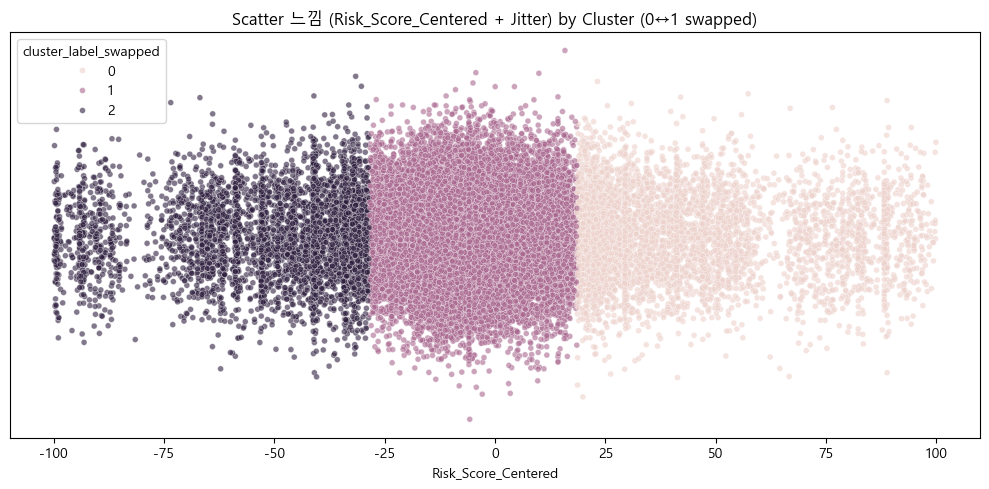

In [46]:
X = df_general[['Risk_Score_Centered']]

# KMeans 모델 생성 (군집 3개)
# random_state를 고정하면 돌릴 때마다 똑같은 결과가 나와서 좋아.
kmeans = KMeans(n_clusters=3, random_state=42)

# 학습 및 예측 (군집 번호 0, 1, 2 생성)
df_general['cluster_label'] = kmeans.fit_predict(X)

X = df_general[["Risk_Score_Centered"]].copy()
kmeans = KMeans(n_clusters=3, random_state=42)
df_general["cluster_label"] = kmeans.fit_predict(X)

# ✅ 여기 추가: 0과 1만 바꾸기(2는 그대로)
df_general["cluster_label_swapped"] = df_general["cluster_label"].replace({0: 1, 1: 0}).replace({0:2,2:0})

# 각 군집별로 데이터가 몇 개씩 들어갔는지 확인해볼까?
print("\n군집별 데이터 개수:")
print(df_general['cluster_label_swapped'].value_counts().sort_index())

# y축에 아주 작은 흔들림 주기(점 겹침 방지)
np.random.seed(42)
df_general["y_jitter"] = np.random.normal(loc=0, scale=0.03, size=len(df_general))

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df_general,
    x="Risk_Score_Centered",
    y="y_jitter",
    hue="cluster_label_swapped",   # ✅ 스왑된 라벨로 표시
    hue_order=[0, 1, 2],           # ✅ 범례 순서 고정
    s=18,
    alpha=0.6
)

plt.title("Scatter 느낌 (Risk_Score_Centered + Jitter) by Cluster (0↔1 swapped)")
plt.xlabel("Risk_Score_Centered")
plt.ylabel("")
plt.yticks([])

plt.tight_layout()
plt.savefig("viz_scatter_jitter_by_cluster_swapped01.png", dpi=200)
plt.show()


In [47]:
df_general['cluster_label_swapped'].value_counts(normalize=True)

cluster_label_swapped
1    0.726661
0    0.149504
2    0.123835
Name: proportion, dtype: float64

In [48]:
# Target 변수 생성 함수 정의
def create_target(label):
    if label == 0:
        return 1  # 이탈 (군집 0)
    else:
        return 0  # 잔존 (군집 1, 2)

# apply 함수를 써서 Target 컬럼 만들기
df_general['Target'] = df_general['cluster_label_swapped'].apply(create_target)

# 잘 만들어졌는지 결과 확인!
print("\n생성된 Target 변수 분포:")
print(df_general['Target'].value_counts())

# 최종 데이터 확인
display(df_general.head(10))


생성된 Target 변수 분포:
Target
0    30583
1     5376
Name: count, dtype: int64


,발급회원번호,이용건수_신용_B0M_07,이용건수_신용_B0M_08,이용건수_신용_B0M_09,이용건수_신용_B0M_10,이용건수_신용_B0M_11,이용건수_신용_B0M_12,이용금액_신용_B0M_07,이용금액_신용_B0M_08,이용금액_신용_B0M_09,...,Norm_Slope_Balance,Norm_Slope_Count,Score_Slope_Total,Final_Total_Score,Score_Clipped,Risk_Score_Centered,cluster_label,cluster_label_swapped,y_jitter,Target
0,SYN_1000048,28,25,27,33,34,35,640723,553131,593691,...,0.000000,0.000000,0.000000,-10.674369,-10.674369,-20.973180,0,1,0.014901,0
1,SYN_1000194,3,3,0,8,5,4,351844,379444,262704,...,0.007293,0.000000,4.227296,-26.496139,-26.496139,-43.303826,1,2,-0.004148,0
2,SYN_1000201,10,12,7,8,2,3,289406,241534,196724,...,0.003962,0.161616,8.639900,17.561960,17.561960,18.879216,2,0,0.019431,1
3,SYN_1000250,1,1,-1,0,-2,0,442734,547248,499902,...,0.012933,0.032828,2.929491,1.464746,1.464746,-3.840188,0,1,0.045691,0
4,SYN_1000338,3,5,3,2,-1,-1,165173,239393,212278,...,0.001991,0.098485,6.383470,43.082465,43.082465,54.898534,2,0,-0.007025,1
5,SYN_1000371,16,16,18,20,17,20,664319,610625,574485,...,0.027067,0.000000,2.206415,-6.661142,-6.661142,-15.308963,0,1,-0.007024,0
6,SYN_1000447,66,64,64,60,66,65,223330,221450,258736,...,0.000485,0.007576,0.241837,-3.640813,-3.640813,-11.046108,0,1,0.047376,0
7,SYN_100058,19,11,8,10,9,7,504407,400438,310245,...,0.055279,0.161616,8.704387,11.294074,11.294074,10.032802,0,1,0.023023,0
8,SYN_100076,35,29,31,21,16,22,1406160,809191,859918,...,0.000000,0.287879,16.696298,14.747075,14.747075,14.906324,0,1,-0.014084,0
9,SYN_1000910,-3,0,-3,2,0,-3,-28073,-16156,-47126,...,0.000025,0.000000,0.399320,37.173154,37.173154,46.558207,2,0,0.016277,1


In [50]:
df_vip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   발급회원번호                 8902 non-null   object 
 1   이용건수_신용_B0M_07         8902 non-null   int64  
 2   이용건수_신용_B0M_08         8902 non-null   int64  
 3   이용건수_신용_B0M_09         8902 non-null   int64  
 4   이용건수_신용_B0M_10         8902 non-null   int64  
 5   이용건수_신용_B0M_11         8902 non-null   int64  
 6   이용건수_신용_B0M_12         8902 non-null   int64  
 7   이용금액_신용_B0M_07         8902 non-null   int64  
 8   이용금액_신용_B0M_08         8902 non-null   int64  
 9   이용금액_신용_B0M_09         8902 non-null   int64  
 10  이용금액_신용_B0M_10         8902 non-null   int64  
 11  이용금액_신용_B0M_11         8902 non-null   int64  
 12  이용금액_신용_B0M_12         8902 non-null   int64  
 13  잔액_B0M_07              8902 non-null   float64
 14  잔액_B0M_08              8902 non-null   float64
 15  잔액_B

In [51]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35959 entries, 0 to 35958
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   발급회원번호                 35959 non-null  object 
 1   이용건수_신용_B0M_07         35959 non-null  int64  
 2   이용건수_신용_B0M_08         35959 non-null  int64  
 3   이용건수_신용_B0M_09         35959 non-null  int64  
 4   이용건수_신용_B0M_10         35959 non-null  int64  
 5   이용건수_신용_B0M_11         35959 non-null  int64  
 6   이용건수_신용_B0M_12         35959 non-null  int64  
 7   이용금액_신용_B0M_07         35959 non-null  int64  
 8   이용금액_신용_B0M_08         35959 non-null  int64  
 9   이용금액_신용_B0M_09         35959 non-null  int64  
 10  이용금액_신용_B0M_10         35959 non-null  int64  
 11  이용금액_신용_B0M_11         35959 non-null  int64  
 12  이용금액_신용_B0M_12         35959 non-null  int64  
 13  잔액_B0M_07              35959 non-null  float64
 14  잔액_B0M_08              35959 non-null  float64
 15  잔액